In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

# NỘI DUNG 1: (7đ) Exploratory Data Analysis - EDA

1. (0.5đ) Đoc dữ lịệu file `gapminder_tidy.csv`
2. (1đ) Tính số năm `Year`, số quốc gia `Country` và số khu vực `region` được đưa vào dữ liệu
3. (1đ) Các thuộc tính quan sát là `observed_features = ['fertility','life','child_mortality','gdp']`. Hãy vẽ đồ thị Histogram biểu diễn phân phối dữ liệu của các thuộc tính qua sát trên.
4. (1đ) Bổ sung dữ liệu rỗng trong `observed_features` với giá trị trung bình của trường dữ liệu đó. Vẽ đồ thị `boxplot` cho các trường dữ liệu trong `observed_features`.
5. (1.5đ) Vẽ biểu đồ `bar` cho các thuộc tính quan sát `observed_features` theo các khu vực và đưa ra nhận xét là khu vực nào cao nhất theo từng trường dữ liệu trong `observed_features`.
6. (1đ) Tạo tập dữ liệu mới với tên quốc gia `country` làm chỉ mục (index) và giá trị là giá trị trung bình của tất cả các thuộc tính quan sát `observed_features`.
7. (1đ) Tìm quốc gia có giá trị tối thiểu và tối đa cho từng thuộc tính


## 1. Đoc dữ lịệu file `gapminder_tidy.csv`

In [5]:
df = pd.read_csv("gapminder_tidy.csv")
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


## 2. Tính số năm `Year`, số quốc gia `Country` và số khu vực `region` được đưa vào dữ liệu

In [11]:
print("Số năm:", df["Year"].nunique())
print("Số quốc gia:", df["Country"].nunique())
print("Số khu vực:", df["region"].nunique())

Số năm: 50
Số quốc gia: 204
Số khu vực: 6


## 3. Các thuộc tính quan sát là `observed_features`. Hãy vẽ đồ thị Histogram biểu diễn phân phối dữ liệu của các thuộc tính qua sát trên.

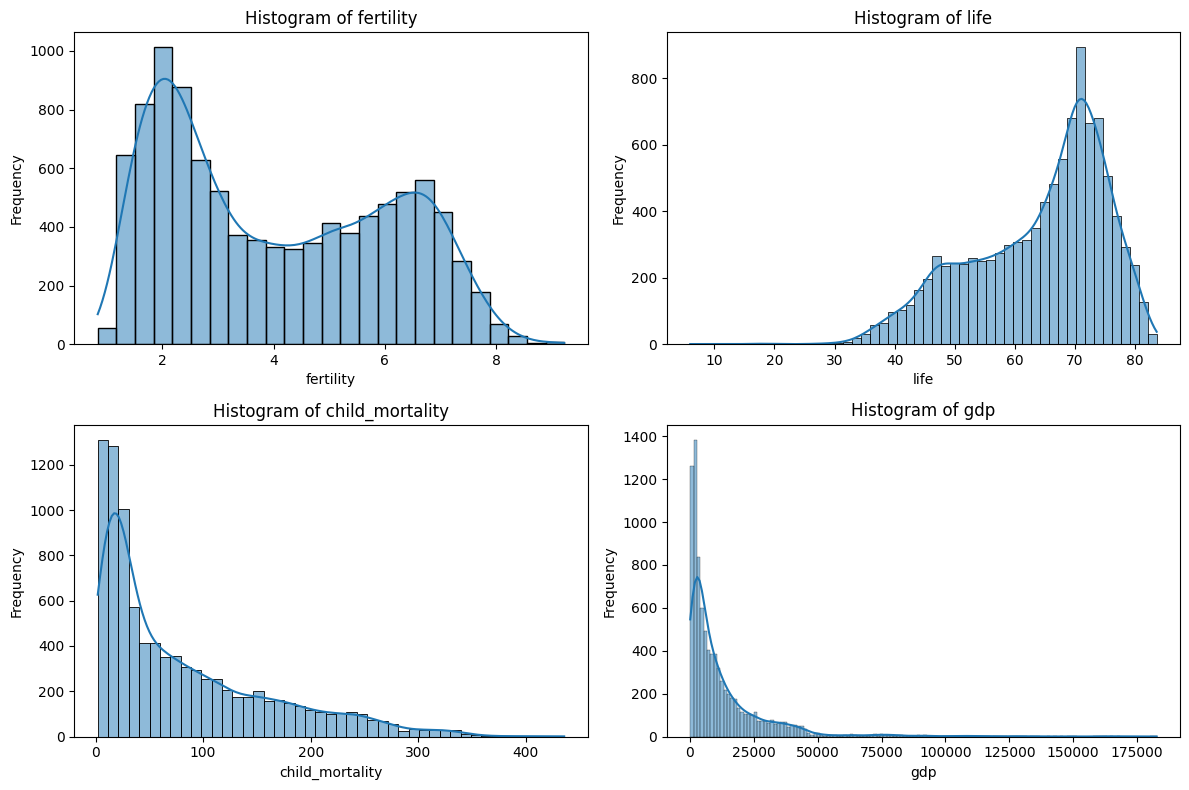

In [15]:
# Danh sách các thuộc tính quan sát
observed_features = ['fertility', 'life', 'child_mortality', 'gdp']

# Vẽ Histogram cho từng thuộc tính
plt.figure(figsize=(12, 8))
for i, feature in enumerate(observed_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

4. Bổ sung dữ liệu rỗng trong `observed_features` với giá trị trung bình của trường dữ liệu đó. Vẽ đồ thị `boxplot` cho các trường dữ liệu trong `observed_features`.

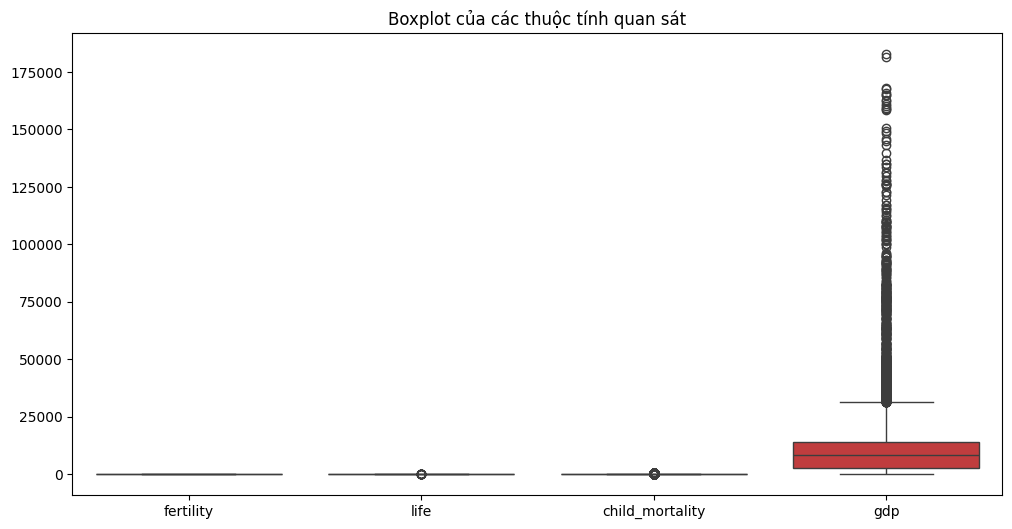

In [16]:
# Thay thế giá trị rỗng (NaN) bằng giá trị trung bình của từng cột trong observed_features
df[observed_features] = df[observed_features].fillna(df[observed_features].mean())

# Vẽ Boxplot để quan sát phân phối dữ liệu
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[observed_features])
plt.title("Boxplot của các thuộc tính quan sát")
plt.show()

## 5. Vẽ biểu đồ `bar` cho các thuộc tính quan sát `observed_features` theo các khu vực và đưa ra nhận xét là khu vực nào cao nhất theo từng trường dữ liệu trong `observed_features`.

                            fertility       life  child_mortality  \
region                                                              
America                      3.486061  68.722251        55.000832   
East Asia & Pacific          3.726025  66.108632        63.110822   
Europe & Central Asia        2.221266  71.931303        33.662653   
Middle East & North Africa   4.970019  65.194301        70.572816   
South Asia                   5.004162  57.137710       137.767150   
Sub-Saharan Africa           5.956105  51.664426       156.356352   

                                     gdp  
region                                    
America                     11829.320833  
East Asia & Pacific         13225.375338  
Europe & Central Asia       18086.099870  
Middle East & North Africa  26104.653968  
South Asia                   2552.650000  
Sub-Saharan Africa           3728.097800  


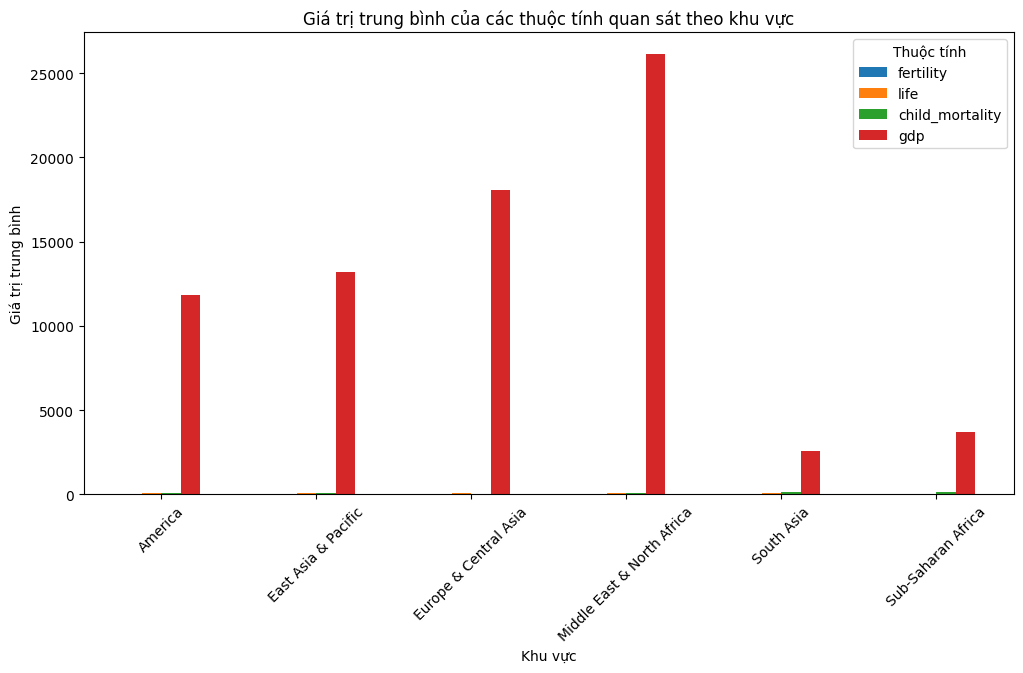

In [20]:
region_means = df.groupby("region")[observed_features].mean()
print(region_means)

# Vẽ biểu đồ cột
region_means.plot(kind="bar", figsize=(12, 6))
plt.title("Giá trị trung bình của các thuộc tính quan sát theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Giá trị trung bình")
plt.legend(title="Thuộc tính")
plt.xticks(rotation=45)
plt.show()

## 6. Tạo tập dữ liệu mới với tên quốc gia `country` làm chỉ mục (index) và giá trị là giá trị trung bình của tất cả các thuộc tính quan sát `observed_features`.

In [23]:
df_country_avg = df.groupby("Country")[observed_features].mean()
print(df_country_avg)
df_country_avg.head()

                     fertility      life  child_mortality           gdp
Country                                                                
Afghanistan           7.359780  47.35280       203.198000   1187.200000
Albania               3.290100  71.64512        57.443400   5012.520000
Algeria               5.065340  62.26872       106.082000   9662.180000
Angola                6.988800  42.32716       229.667800   4719.160000
Antigua and Barbuda   2.528700  70.63692        30.917800  13765.380000
...                        ...       ...              ...           ...
Western Sahara        4.545980  54.91502        91.469642  12746.916667
Yemen, Rep.           7.303940  53.65530        80.834505  12746.916667
Zambia                6.633800  47.73318       153.464000   2990.060000
Zimbabwe              5.608020  53.96624        94.108000   2233.760000
Åland                 4.028719  80.13900        80.834505  12746.916667

[204 rows x 4 columns]


,fertility,life,child_mortality,gdp
Country,,,,
Afghanistan,7.35978,47.35280,203.1980,1187.20
Albania,3.29010,71.64512,57.4434,5012.52
Algeria,5.06534,62.26872,106.0820,9662.18
Angola,6.98880,42.32716,229.6678,4719.16
Antigua and Barbuda,2.52870,70.63692,30.9178,13765.38


##7. Tìm quốc gia có giá trị tối thiểu và tối đa cho từng thuộc tính



In [25]:
# Tìm quốc gia có giá trị tối thiểu và tối đa cho từng thuộc tính
observed_features = ['fertility', 'life', 'child_mortality', 'gdp']

min_values = df.loc[df[observed_features].idxmin(), ['Country'] + observed_features]
max_values = df.loc[df[observed_features].idxmax(), ['Country'] + observed_features]

# Hiển thị kết quả
print("Quốc gia có giá trị tối thiểu cho từng thuộc tính:")
print(min_values)

print("\nQuốc gia có giá trị tối đa cho từng thuộc tính:")
print(max_values)


Quốc gia có giá trị tối thiểu cho từng thuộc tính:
           Country  fertility    life  child_mortality      gdp
5340  Macao, China      0.836  78.458             8.11  60450.0
7530        Rwanda      6.416   6.000           293.80    509.0
5299    Luxembourg      1.671  80.547             2.00  88850.0
5131       Liberia      6.156  50.163           237.40    142.0

Quốc gia có giá trị tối đa cho từng thuộc tính:
                   Country  fertility    life  child_mortality            gdp
9970           Yemen, Rep.      9.223  53.486        80.834505   12746.916667
4499                 Japan      1.419  83.580         2.900000   35614.000000
5600                  Mali      6.793  29.097       435.800000     799.000000
9417  United Arab Emirates      5.423  67.615        35.200000  182668.000000


# Nội Dung 2: (3đ) Phân phối xác suất

Các sản phẩm được sản xuất trong một dây chuyền. Để thực hiện kiểm tra chất
lượng, mỗi giờ người ta rút ngẫu nhiên không hoàn lại 10 sản phẩm từ một hộp có 25 sản phẩm. Quá trình sản xuất được báo cáo là đạt yêu cầu nếu có không quá một sản phẩm là thứ phẩm.

1. (1đ) Nếu tất cả các hộp được kiểm tra đều chứa chính xác hai thứ phẩm, thì xác suất quá trình sản xuất được báo cáo đạt yêu cầu ít nhất 7 lần trong một ngày làm việc 8 giờ là bao nhiêu?
2. (1đ) Sử dụng phân phối Poisson để xấp xỉ xác suất được tính trong câu (a)
3. (1đ) Biết rằng lần kiểm tra chất lượng cuối cùng trong câu (a), quá trình sản xuất được báocáo đạt yêu cầu. Hỏi xác suất mẫu 10 sản phẩm tương ứng không chứa thứ phẩm là bao nhiêu?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom, poisson, norm, t
from math import comb

# (a) Xác suất quá trình sản xuất được báo cáo đạt yêu cầu ít nhất 7 lần trong 8 giờ

# Thông số bài toán
N = 25  # Tổng số sản phẩm trong hộp
K = 2   # Số thứ phẩm trong hộp
n = 10  # Số sản phẩm lấy ra mỗi lần kiểm tra

# P(X = 0)
p_x0 = (comb(K, 0) * comb(N - K, n)) / comb(N, n)

# P(X = 1)
p_x1 = (comb(K, 1) * comb(N - K, n - 1)) / comb(N, n)

# P(X ≤ 1)
p_success = p_x0 + p_x1
print(f"P(X ≤ 1) = {p_success:.4f}")

# Y ~ Binomial(8, p_success), tìm P(Y ≥ 7)
n_hours = 8
p_geq_7 = 1 - binom.cdf(6, n_hours, p_success)  # Đúng cú pháp
print(f"P(Y ≥ 7) = {p_geq_7:.4f}")

# (b) Xấp xỉ bằng phân phối Poisson
lambda_poisson = n_hours * p_success
p_poisson_geq_7 = 1 - poisson.cdf(6, lambda_poisson)
print(f"P(Y ≥ 7) (Poisson) = {p_poisson_geq_7:.4f}")

# (c) Xác suất không có thứ phẩm trong mẫu 10 sản phẩm nếu đã đạt yêu cầu
p_conditional = p_x0 / p_success
print(f"P(X = 0 | X ≤ 1) = {p_conditional:.4f}")


P(X ≤ 1) = 0.8500
P(Y ≥ 7) = 0.6572
P(Y ≥ 7) (Poisson) = 0.5201
P(X = 0 | X ≤ 1) = 0.4118
